In [43]:
# 모듈 불러오기
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare

In [10]:
# 전처리 완료한 데이터 불러오기
df = pd.read_csv("data/data_visualization.csv", low_memory=False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170813 entries, 0 to 6170812
Data columns (total 21 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Case Number           object
 2   Date                  object
 3   Block                 object
 4   IUCR                  object
 5   Primary Type          object
 6   Description           object
 7   Location Description  object
 8   Arrest                bool  
 9   Domestic              bool  
 10  Beat                  int64 
 11  District              object
 12  Ward                  object
 13  FBI Code              object
 14  X Coordinate          object
 15  Y Coordinate          object
 16  Year                  int64 
 17  Latitude              object
 18  Longitude             object
 19  Location              object
 20  Community Area Code   int64 
dtypes: bool(2), int64(4), object(15)
memory usage: 906.3+ MB


📌가설 1. 폭력범죄의 경우, 재산범죄보다 체포율이 높을것이다.

📌가설 2. 마약관련 범죄는 주거지에서 자주 발생하며 체포율이 높을 것이다.

📌가설 3. 절도 범죄는 출퇴근 시간에 벌어졌을 것이다.

📌가설 4. 마약 관련 범죄는 요일에 상관 없이 일어났을 것이다.

📌가설 5. 실업률이 많은 지역은 범죄건수가 높을 것이다.

In [12]:
# 범죄 유형 정리
# 폭력범죄
violent_crime = ['BATTERY', 'ASSAULT', 'HOMICIDE', 'CRIM SEXUAL ASSAULT', 'STALKING', 'KIDNAPPING',
                 'INTIMIDATION', 'DOMESTIC VIOLENCE', 'HUMAN TRAFFICKING']
# 성범죄
sex_crime = ['SEX OFFENSE', 'OBSCENITY', 'PUBLIC INDECENCY', 'PROSTITUTION']

# 재산범죄
property_crime = ['THEFT', 'BURGLARY', 'ROBBERY', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE']

# 마약/기타 유사
drug_crime = ['NARCOTICS', 'OTHER NARCOTIC VIOLATION', 'LIQUOR LAW VIOLATION']

# 무기/공공질서
weapons_public_crime = ['WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
                        'CONCEALED CARRY LICENSE VIOLATION']

# 기타
other_crime = ['OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN', 'NON-CRIMINAL', 'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
               'RITUALISM', 'GAMBLING', 'ARSON', 'CRIMINAL TRESPASS']

In [14]:
# 171개의 Location Description을 분류
# Residential(거주지)
residential = ['RESIDENCE', 'RESIDENCE PORCH/HALLWAY', 'APARTMENT', 'HOUSE', 'COACH HOUSE', 'PORCH', 'GARAGE', 'YARD', 'HALLWAY',
               'RESIDENCE-GARAGE', 'DRIVEWAY - RESIDENTIAL', 'BASEMENT', 'STAIRWELL', 'ROOMING HOUSE', 'RESIDENTIAL YARD (FRONT/BACK)',
               'CHA APARTMENT', 'CHA PLAY LOT', 'CHA HALLWAY', 'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA LOBBY', 'CHA STAIRWELL', 
               'CHA BREEZEWAY', 'CHA PARKING LOT', 'CHA PARKING LOT/GROUNDS', 'CHA GROUNDS', 'CHA ELEVATOR']

# Commercial(상업 공간)
commercial = ['RETAIL STORE', 'SMALL RETAIL STORE', 'DEPARTMENT STORE', 'RESTAURANT', 'TAVERN', 'LIQUOR STORE', 
              'TAVERN/LIQUOR STORE', 'BANK', 'SAVINGS AND LOAN', 'DRUG STORE', 'GROCERY FOOD STORE', 'CONVENIENCE STORE', 'GAS STATION', 
              'GAS STATION DRIVE/PROP.', 'AUTO', 'APPLIANCE STORE', 'MOVIE HOUSE/THEATER', 'BOWLING ALLEY', 'PAWN SHOP', 'CLEANING STORE',
              'COIN OPERATED MACHINE', 'NEWSSTAND', 'POOL ROOM', 'POOLROOM', 'CLEANERS/LAUNDROMAT', 'GARAGE/AUTO REPAIR', 'BAR OR TAVERN',
              'BARBER SHOP/BEAUTY SALON', 'BARBERSHOP', 'HAIR SALON', 'CURRENCY EXCHANGE', 'CREDIT UNION', 'LOBBY', 'LOADING DOCK']

#Public/Institutional(공공 시설)
public = ['SCHOOL, PRIVATE, GROUNDS', 'SCHOOL, PUBLIC, BUILDING', 'SCHOOL, PRIVATE, BUILDING', 'SCHOOL, PUBLIC, GROUNDS', 
          'SCHOOL YARD', 'PUBLIC GRAMMAR SCHOOL', 'PUBLIC HIGH SCHOOL', 'COLLEGE/UNIVERSITY GROUNDS', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 
          'DAY CARE CENTER', 'LIBRARY', 'HOSPITAL', 'HOSPITAL BUILDING/GROUNDS', 'MEDICAL/DENTAL OFFICE', 'NURSING HOME', 
          'NURSING HOME/RETIREMENT HOME', 'FUNERAL PARLOR', 'GOVERNMENT BUILDING/PROPERTY', 
          'FEDERAL BUILDING', 'POLICE FACILITY/VEH PARKING LOT', 'FIRE STATION', 'YMCA', 'CHURCH', 'CHURCH PROPERTY', 
          'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'OFFICE']

# Transportation(교통수단 관련)
transportaion = ['PARKING LOT', 'PARKING LOT/GARAGE(NON.RESID.)', 'DRIVEWAY', 'HIGHWAY/EXPRESSWAY', 'VEHICLE NON-COMMERCIAL', 
                 'VEHICLE-COMMERCIAL', 'TAXICAB', 'TAXI CAB', 'TRUCKING TERMINAL', 'DELIVERY TRUCK', 'LIVERY STAND OFFICE',
                 'VEHICLE - DELIVERY TRUCK', 'VEHICLE - OTHER RIDE SERVICE', 'TRUCK', 'DELIVERY TRUCK',
                 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
                 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA',
                 'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA',
                 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT EXTERIOR - SECURE AREA',
                 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRPORT PARKING LOT', 'AIRPORT/AIRCRAFT', 'AIRCRAFT', 
                 'AIRPORT VENDING ESTABLISHMENT', 'AIRPORT TRANSPORTATION SYSTEM (ATS)', 'CTA BUS', 'CTA "L" TRAIN', 'CTA "L" PLATFORM', 
                 'CTA PLATFORM', 'CTA STATION', 'CTA PROPERTY', 'CTA GARAGE / OTHER PROPERTY', 'CTA BUS STOP', 'CTA TRACKS - RIGHT OF WAY']

# Outdoor/Open(오픈된 외부)
outdoor = ['STREET', 'SIDEWALK', 'ALLEY', 'SEWER', 'BRIDGE', 'PARK PROPERTY', 'FOREST PRESERVE', 'PARK', 'RIVER', 'LAKE', 'RIVER BANK',
           'LAKEFRONT/WATERFRONT/RIVERBANK', 'CEMETARY', 'WOODED AREA', 'VACANT LOT', 'VACANT LOT/LAND', 'PRAIRIE', 
           'JUNK YARD/GARBAGE DUMP']

# Other(기타)
other = ['OTHER', 'UNKNOWN', 'DUMPSTER', 'VESTIBULE', 'CHA ELEVATOR', 'FACTORY/MANUFACTURING BUILDING', 'FACTORY', 
         'WAREHOUSE', 'LOADING DOCK', 'CONSTRUCTION SITE', 'ANIMAL HOSPITAL', 'TRAILER', 'ATM (AUTOMATIC TELLER MACHINE)', 
         'ATHLETIC CLUB', 'LIVERY AUTO', 'ELEVATOR', 'NEWSSTAND', 'CLEANERS/LAUNDROMAT', 'BOAT/WATERCRAFT', 'BANQUET HALL']

#### 📌가설 1. 폭력범죄의 경우, 재산범죄보다 체포율이 높을것이다.

In [16]:
# 각 범죄 유형별 체포율 계산
violent_crime_arrest_rate = df[df['Primary Type'].isin(violent_crime)]['Arrest'].mean()
property_crime_arrest_rate = df[df['Primary Type'].isin(property_crime)]['Arrest'].mean()

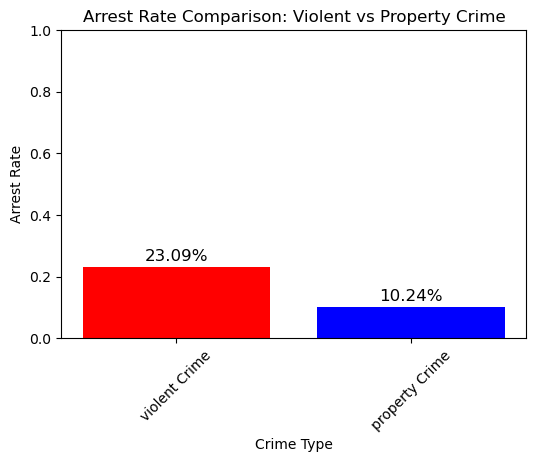

In [18]:
# 범죄 유형 및 체포율 리스트
crime_types = ['violent Crime', 'property Crime']
arrest_rates = [violent_crime_arrest_rate, property_crime_arrest_rate]

# 막대 그래프 그리기
plt.figure(figsize=(6,4))
plt.bar(crime_types, arrest_rates, color=['red', 'blue'])

# 그래프 꾸미기
plt.xlabel("Crime Type")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate Comparison: Violent vs Property Crime")
plt.ylim(0, 1)  # 체포율 범위 (0~1)
plt.xticks(rotation=45)

# 값 표시
for i, rate in enumerate(arrest_rates):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=12)

# 그래프 출력
plt.show()

- 폭력범죄는 재산범죄보다 체포율이 높다

#### 📌가설 2. 마약 관련 범죄는 주거지에서 자주 발생할것이다.

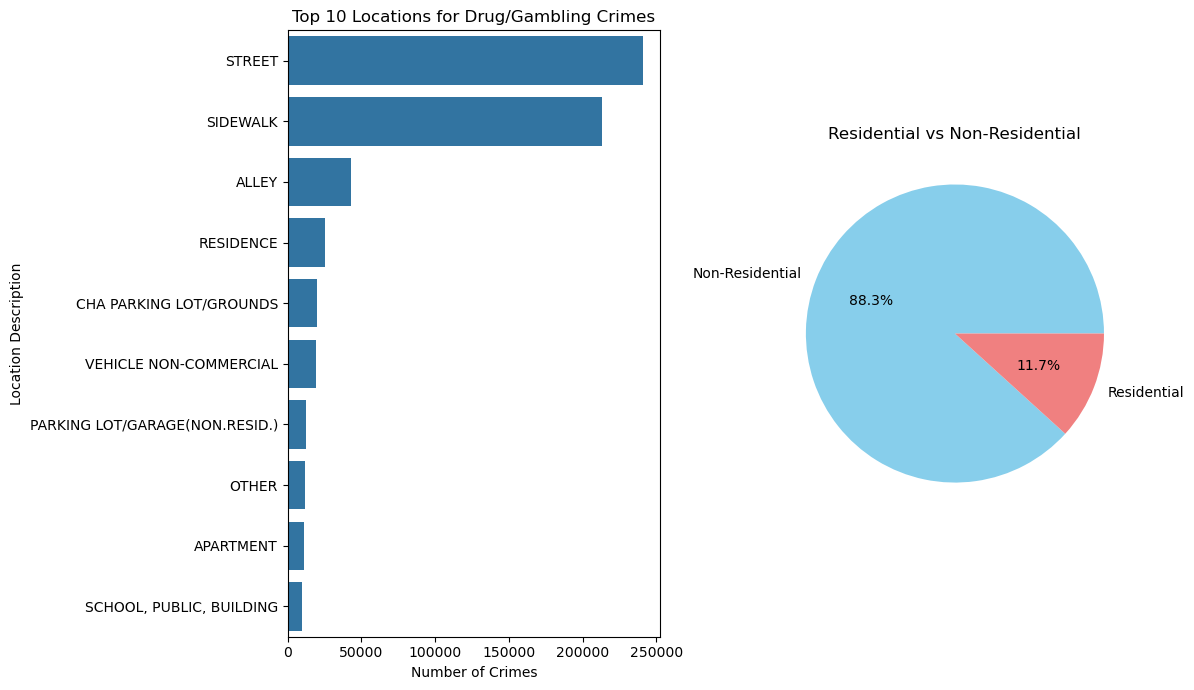

Chi-Square Statistic: 1.78
P-value: 0.1818


In [20]:
# 주거지 관련 장소 리스트
residential_locations = [
               'RESIDENCE', 'RESIDENCE PORCH/HALLWAY', 'APARTMENT', 'HOUSE', 'COACH HOUSE', 'PORCH', 'GARAGE', 'YARD', 'HALLWAY',
               'RESIDENCE-GARAGE', 'DRIVEWAY - RESIDENTIAL', 'BASEMENT', 'STAIRWELL', 'ROOMING HOUSE', 'RESIDENTIAL YARD (FRONT/BACK)',
               'CHA APARTMENT', 'CHA PLAY LOT', 'CHA HALLWAY', 'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA LOBBY', 'CHA STAIRWELL', 
               'CHA BREEZEWAY', 'CHA PARKING LOT', 'CHA PARKING LOT/GROUNDS', 'CHA GROUNDS', 'CHA ELEVATOR']

# 주거지/비주거지 여부 컬럼 추가 (SettingWithCopyWarning 방지)
df_drug_gambling = df[df['Primary Type'].isin(['NARCOTICS', 'OTHER NARCOTIC VIOLATION'])].copy()

df_drug_gambling['is_residential'] = df_drug_gambling['Location Description'].apply(
    lambda x: 'Residential' if x in residential_locations else 'Non-Residential'
)

# 주거지 vs 비주거지 범죄 발생 건수
location_counts = df_drug_gambling['is_residential'].value_counts()

# 시각화
plt.figure(figsize=(12, 7))

# 장소별 범죄 발생 건수 (막대 그래프)
plt.subplot(1, 2, 1)
sns.countplot(y=df_drug_gambling['Location Description'], 
              order=df_drug_gambling['Location Description'].value_counts().index[:10])
plt.title("Top 10 Locations for Drug/Gambling Crimes")
plt.xlabel("Number of Crimes")
plt.ylabel("Location Description")

# 주거지 vs 비주거지 건수 비율 (파이 차트)
plt.subplot(1, 2, 2)
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Residential vs Non-Residential")

plt.tight_layout()
plt.show()

# 카이제곱 검정 (주거지 vs 비주거지 범죄 차이 분석)
contingency_table = pd.crosstab(df_drug_gambling['is_residential'], df_drug_gambling['Primary Type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

In [22]:
# 카이제곱 검정 실행
contingency_table = pd.crosstab(df_drug_gambling['is_residential'], df_drug_gambling['Primary Type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Cramér's V 계산
n = contingency_table.sum().sum()  # 전체 데이터 개수
k = min(contingency_table.shape)   # 행과 열 중 작은 값
cramers_v = np.sqrt(chi2 / (n * (k - 1)))

print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.0016


- 두 개의 범주형 변수간의 독립성을 검정하기 위해 카이제곱 검정을 사용  
- 귀무가설(H₀): 주거지 여부와 마약 범죄 발생 건수는 관계가 없다.  
- 대립가설(H₁): 주거지에서 마약/도박 범죄가 더 자주 발생한다.  
- 검정 결과: p-value = 0.1818 (유의수준 0.05보다 큼) → 대립가설 기각 → 귀무가설 채택 → 주거지 여부와 마약관련 범죄 발생 건수는 관계가 없다.

- Cramér's V = 0.0016 → 주거지 여부가 마약 관련 범죄 유형에 미치는 영향이 극히 미미하거나 없다고 볼 수 있음.

In [25]:
# 데이터 형태 변환
# 날짜형으로 변환 (object → datetime)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

/var/folders/1k/kfyrfwj51r7_zts1bndgk56c0000gn/T/ipykernel_38449/2967806328.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [52]:
print(df['Date'].head())

0   2004-01-01 00:01:00
1   2003-03-01 00:00:00
2   2004-06-20 11:00:00
3   2004-12-30 20:00:00
4   2003-05-01 01:00:00
Name: Date, dtype: datetime64[ns]


In [70]:
# 결과 확인
print(time_df[['Date', 'Hour']].head())

                 Date  Hour
0 2004-01-01 00:01:00     0
3 2004-12-30 20:00:00    20
4 2003-05-01 01:00:00     1
5 2004-08-01 00:01:00     0
8 2004-09-16 10:00:00    10


#### 📌 가설 3. 절도 범죄는 출퇴근 시간에 벌어졌을 것이다.

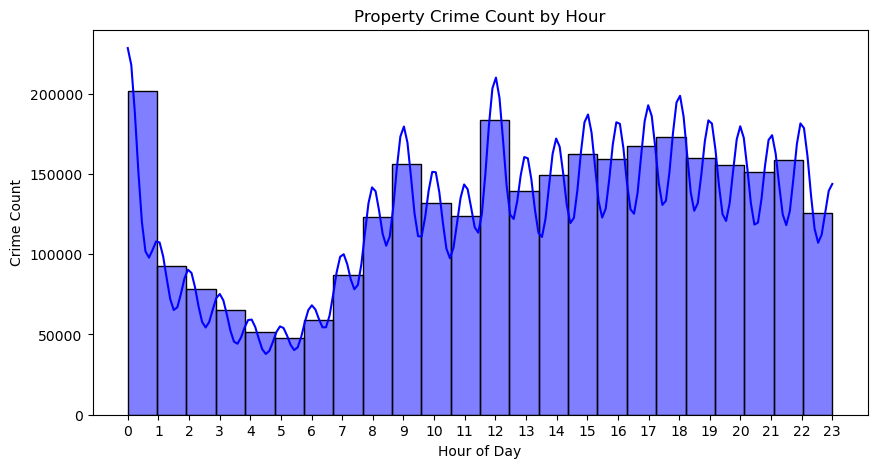

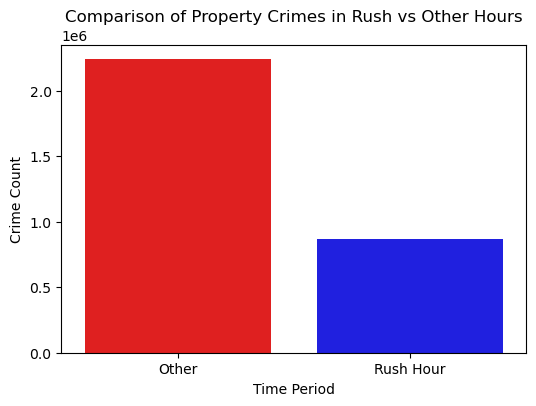


Chi-Square Test Results:
Chi-Square Statistic: 9166.77
p-value: 0.0000


In [27]:
# 범죄 유형 필터링
time_df = df[df['Primary Type'].isin(property_crime)].copy()

# 발생 시간 변환
time_df['Hour'] = time_df['Date'].dt.hour  # 시간 추출

# 출퇴근 시간 정의 (예: 7~9시, 17~19시)
time_df['Time Period'] = time_df['Hour'].apply(lambda x: 'Rush Hour' if x in [7, 8, 9, 17, 18, 19] else 'Other')

# 시간대별 범죄 발생 건수 시각화
plt.figure(figsize=(10, 5))
sns.histplot(time_df['Hour'], bins=24, kde=True, color='blue')
plt.xticks(range(24))
plt.xlabel('Hour of Day')
plt.ylabel('Crime Count')
plt.title('Property Crime Count by Hour')
plt.show()

# 출퇴근 시간 vs 기타 시간대 비교 (막대그래프)
plt.figure(figsize=(6, 4))
sns.countplot(x='Time Period', data=time_df, hue='Time Period', palette=['red', 'blue'])
plt.xlabel('Time Period')
plt.ylabel('Crime Count')
plt.title('Comparison of Property Crimes in Rush vs Other Hours')
plt.show()

# 카이제곱 검정을 위한 교차표 생성
contingency_table = pd.crosstab(time_df['Time Period'], time_df['Primary Type'])

# 카이제곱 검정 수행
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"p-value: {p_val:.4f}")

In [29]:
# 카이제곱 검정을 위한 교차표 생성
contingency_table = pd.crosstab(time_df['Time Period'], time_df['Primary Type'])

# 카이제곱 검정 수행
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Cramér's V 계산
n = contingency_table.sum().sum()  # 전체 데이터 개수
k = min(contingency_table.shape)   # 행과 열 중 작은 값
cramers_v = np.sqrt(chi2_stat / (n * (k - 1)))

print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.0543


- 출퇴근 시간과 기타 시간대 데이터를 비교 (범주형 데이터)

- 출퇴근 시간과 기타 시간대의 범죄 발생 패턴이 다르다고 가정하고 두 범주형 변수간의 독립성을 비교하기 위해 카이제곱을 사용

- 귀무가설(H₀): 출퇴근 시간과 기타 시간대의 범죄 발생 패턴은 차이가 없다.

- 대립가설(H₁): 출퇴근 시간과 기타 시간대의 범죄 발생 패턴은 차이가 있다.

- 검정 결과: p-value = 0.0000 (유의수준 0.05보다 작음) → 귀무가설 기각 → 대립가설 채택  
→ 출퇴근 시간과 기타 시간대의 범죄 발생 패턴은 차이가 있다 → 출퇴근 시간과 기타 시간대에서 절도 범죄의 발생 비율이 다를 가능성이 높음.  
→ 하지만, 출퇴근 시간에 더 많다는 것을 보장하지 않음.  

- Cramér's V = 0.0543 → 출퇴근 시간과 기타 시간대의 범죄 유형 분포가 차이가 있다고 볼 수 있지만, 그 차이가 실질적으로 크진 않음.

#### 📌 가설 4. 마약 관련 범죄는 요일에 상관 없이 일어났을 것이다.

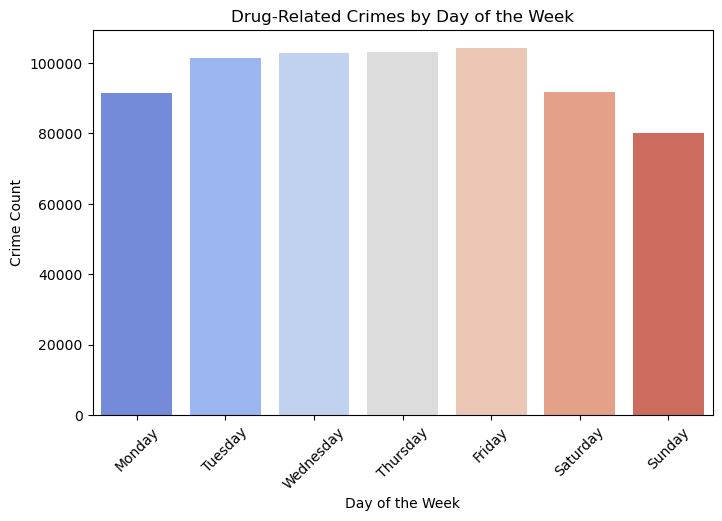

Chi-Square Test Results:
Chi-Square Statistic: 5077.06
p-value: 0.0000


In [45]:
# 마약 관련 범죄 유형 정의
drug_crime = ['NARCOTICS', 'OTHER NARCOTIC VIOLATION']

# 범죄 유형 필터링
df = df[df['Primary Type'].isin(drug_crime)].copy()

# 요일별 범죄 발생 건수 계산
df['Day of Week'] = df['Date'].dt.day_name()  # 요일 추출

# 요일 순서 지정
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
crime_counts = df['Day of Week'].value_counts().reindex(day_order)

# 요일별 마약 범죄 발생 빈도 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=crime_counts.index, y=crime_counts.values, hue=crime_counts.index, palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Crime Count")
plt.title("Drug-Related Crimes by Day of the Week")
plt.xticks(rotation=45)
plt.show()

# 카이제곱 적합도 검정 (요일별 발생 빈도 차이 검정)
observed = np.array(crime_counts)
expected = np.full_like(observed, observed.mean())  # 기대값 = 평균 발생 빈도

# 카이제곱 검정
chi2, p = chisquare(observed, expected)

# 결과 출력
print(f"Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

In [47]:
# 요일별 마약 범죄 발생 빈도
observed = np.array(crime_counts)  # 실제 발생 빈도
expected = np.full_like(observed, observed.mean())  # 기대값 = 평균 발생 빈도

# 카이제곱 적합도 검정 수행
chi2, p = chisquare(observed, expected)

# Cramér's V 계산
n = observed.sum()  # 총 사건 수
k = len(observed)   # 요일 개수 (7개: 월~일)
cramers_v = np.sqrt(chi2 / (n * (k - 1)))

# 결과 출력
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.0354


- 요일별 범죄 발생 빈도 데이터를 비교 (범주형 데이터)

- 카이제곱 검정을 통해 각 범주가 동일하게 분포하는지, 아니면 특정 범주에서 유의미한 차이가 있는지를 분석하기 위해 사용

- 귀무가설(H₀): 요일에 따라 마약 관련 범죄 발생 패턴은 차이가 있다.

- 대립가설(H₁): 요일에 따라 마약 관련 범죄 발생 패턴은 차이가 없다.

- 검정 결과: p-value = 0.0000 (유의수준 0.05보다 작음) → 귀무가설 기각 → 대랍가설 채택  
→ 요일에 따라 마약 관련 범죄 발생 패턴은 차이가 없다 → 마약 범죄 발생은 모든 요일에서 동일한 빈도로 발생.

- Cramér's V = 0.0354 → 요일별 차이가 없지만, 실질적인 영향은 거의 없다.

#### 📌 가설 5. 실업률이 많은 지역은 범죄건수가 높을 것이다.

In [53]:
# 새로운 데이터 불러오기
df2 = pd.read_csv('data/Chicago_Unemployment_Rate_2008_to_2012.csv')

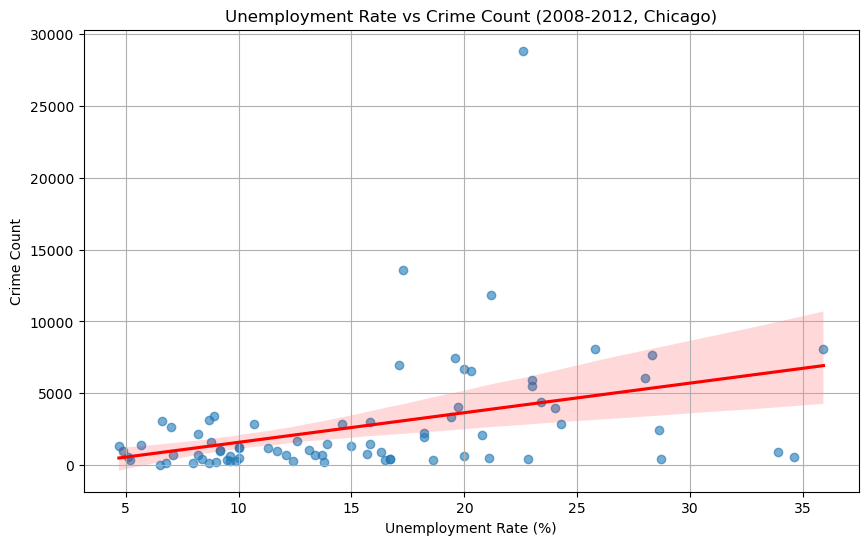

In [55]:
# 2008~2012년 데이터 필터링
crime_df = df[(df['Year'] >= 2008) & (df['Year'] <= 2012)].copy()

# 컬럼 이름 변경
crime_df = crime_df.rename(columns={"Community Area Code": "Community Area Number"})
unemployment_df = df2.rename(columns={"PERCENT AGED 16+ UNEMPLOYED": "Unemployment Rate"})

# Community Area Number별 범죄 발생 건수 집계
crime_counts = crime_df.groupby("Community Area Number").size().reset_index(name="Crime Count")

# 실업률 데이터와 결합
merged_df = crime_counts.merge(unemployment_df, on="Community Area Number", how="left")

# 실업률 vs 범죄 건수 산점도 (회귀선 포함)
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x="Unemployment Rate", y="Crime Count", scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Crime Count")
plt.title("Unemployment Rate vs Crime Count (2008-2012, Chicago)")
plt.grid()
plt.show()

In [57]:
from scipy import stats

# 실업률 기준으로 그룹 나누기
high_unemployment = merged_df[merged_df['Unemployment Rate'] > merged_df['Unemployment Rate'].median()]
low_unemployment = merged_df[merged_df['Unemployment Rate'] <= merged_df['Unemployment Rate'].median()]

# 범죄율의 평균 차이를 비교하기 위한 t-검정
t_stat, p_value = stats.ttest_ind(high_unemployment['Crime Count'], low_unemployment['Crime Count'])


print(f"t Test Results:")
print(f"t Statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

t Test Results:
t Statistic: 3.85
p-value: 0.0002


In [63]:
from scipy.stats import pearsonr

# inf 값을 NaN으로 변환 후 제거
merged_df_cleaned = merged_df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Unemployment Rate", "Crime Count"])

# 상관계수 계산
r, p_value = pearsonr(merged_df_cleaned["Unemployment Rate"], merged_df_cleaned["Crime Count"])

# 결정계수 R² 계산
r_squared = r ** 2

print(f"Pearson’s r: {r:.4f}")
print(f"R² (결정계수): {r_squared:.4f}")

Pearson’s r: 0.3801
R² (결정계수): 0.1445


- 실업률 상위 50%와 하위 50% 지역으로 나눈 후 각 그룹의 범죄건수 평균 차이를 t-검정을 통해 확인
- 귀무가설(H₀): 실업률과 범죄건수 사이에는 유의미한 관계가 없다. (즉, 실업률이 높다고 해서 범죄건수가 높지 않다.)
- 대립가설(H₁): 실업률이 높은 지역은 범죄건수가 높을 것이다.
- 검정 결과: p-value = 0.002 (유의수준 0.05보다 작음) → 귀무가설 기각 → 대립가설 채택  
→ 실업률이 높은 지역은 범죄건수가 높을 것이다.

- 실업률이 범죄를 결정하는 강력한 요인은 아님 → 실업률이 범죄 발생에 영향을 미치지만 그 외 다른 변수들도 중요한 역할을 한다고 해석 가능

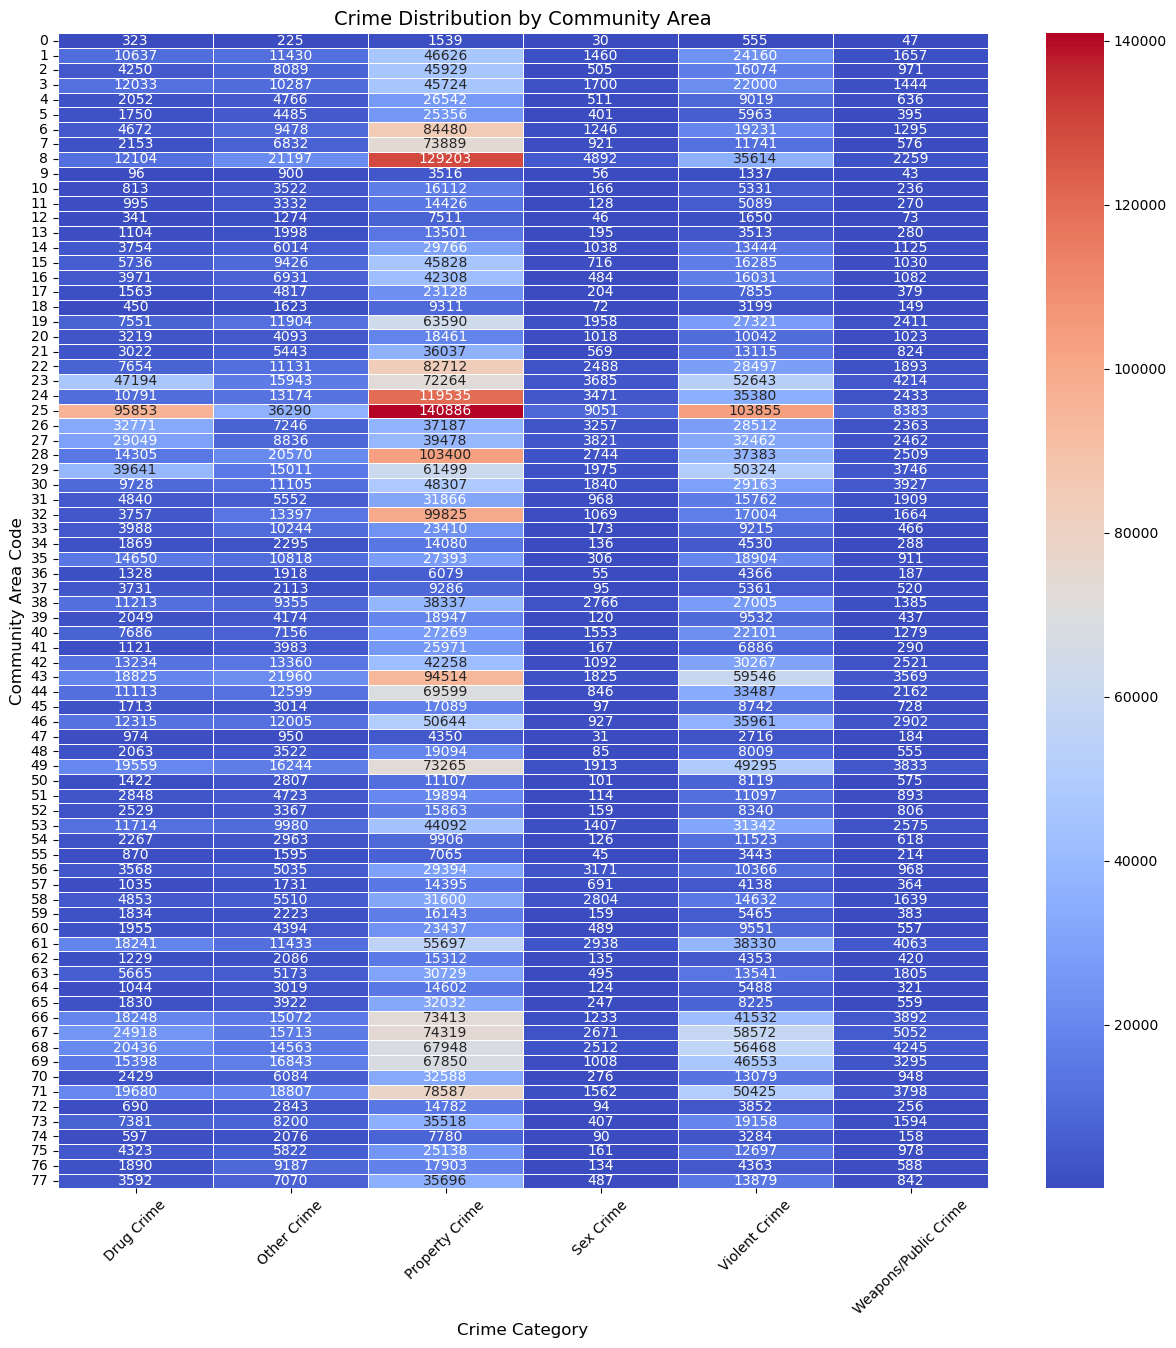

In [118]:
# 범죄 유형 매핑
def categorize_crime(crime_type):
    if crime_type in property_crime:
        return 'Property Crime'
    elif crime_type in violent_crime:
        return 'Violent Crime'
    elif crime_type in sex_crime:
        return 'Sex Crime'
    elif crime_type in drug_crime:
        return 'Drug Crime'
    elif crime_type in weapons_public_crime:
        return 'Weapons/Public Crime'
    else:
        return 'Other Crime'

# 범죄 유형 컬럼 추가
df['Crime Category'] = df['Primary Type'].apply(categorize_crime)

# Community Area Code별 범죄 유형 빈도 계산
crime_counts = df.groupby(['Community Area Code', 'Crime Category']).size().reset_index(name='Count')

# 피벗 테이블 생성
crime_pivot = crime_counts.pivot(index='Community Area Code', columns='Crime Category', values='Count').fillna(0)

# 시각화
plt.figure(figsize=(15, 15))  # 크기 조정
sns.heatmap(crime_pivot, cmap='coolwarm', annot=True, fmt='.0f', linewidths=0.5)  # 숫자 표시 추가
plt.title('Crime Distribution by Community Area', fontsize=14)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Community Area Code', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

- 전반적으로 재산범죄의 비율이 많았지만 25번 구역에서는 마약/도박 범죄와 폭력범죄의 비율이 높은것을 발견할수 있었다.